In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

nb_classes = 10

# the data, shuffled and split between tran and test sets
(Images_train, Labels_train_orig), (Images_test, Labels_test_orig) = mnist.load_data()
print("Images_train original shape", Images_train.shape)
print("Labels_train original shape", Labels_train_orig.shape)

Images_train original shape (60000, 28, 28)
Labels_train original shape (60000,)


In [0]:
#prepare the data. Matrix with each image in one row
#<<<< Adaptar matriz de imágenes de train >>>>
#<<<< Adaptar matriz de imágenes de test >>>>
Images_train = Images_train.reshape((Images_train.shape[0], 28 * 28))
Images_test = Images_test.reshape((Images_test.shape[0], 28 * 28))

Images_train = Images_train.astype('float32')
Images_test = Images_test.astype('float32')
Images_train /= 255
Images_test /= 255
print("Training matrix shape", Images_train.shape)
print("Testing matrix shape", Images_test.shape)

#check input data is right
assert Images_train.shape == (60000, 784), "Train images. Wrong shape, try again"
assert Images_test.shape == (10000, 784), "Test images. Wrong shape, try again"

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [0]:
#categorize, for instance, class 3 categorized to 0 0 0 1 0 0 0 0 0 0
Labels_train = np_utils.to_categorical(Labels_train_orig, nb_classes)
Labels_test = np_utils.to_categorical(Labels_test_orig, nb_classes)


#model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.6))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
	metrics=['accuracy'])

In [0]:
model.fit(Images_train, Labels_train,
          batch_size=128, epochs=2,
          verbose=1,
          validation_data=(Images_test, Labels_test))

score = model.evaluate(Images_test, Labels_test,
                       verbose=1)
print(score)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 6s 101us/step - loss: 0.8378 - acc: 0.7217 - val_loss: 0.2265 - val_acc: 0.9348
Epoch 2/2
10000/10000 [==============================] - 0s 49us/step
[0.1601157738186419, 0.9542]


In [0]:
#Predict test images
predicted_classes = model.predict_classes(Images_test)

#Check correct and incorrect predictions
correct_indices = np.nonzero(predicted_classes == Labels_test_orig)[0]
print(correct_indices.shape)
#<<<< Calcular los índices incorrectos >>>>
#así podríamos ver las imágenes de los números en los que se equivoca
wrong_indices = np.nonzero(predicted_classes != Labels_test_orig)[0]
print(wrong_indices.shape)

(9542,)
(458,)


In [0]:
#<<<< Calcular la precisión para cada clase. precisión = predicciones_correctas/total >>>>
m = np.array(np.max(Labels_test_orig)+1, np.max(Labels_test_orig)+1)
m

array(10)

In [0]:
np.max(Labels_test_orig)

9

Images_train original shape (60000, 28, 28)
Labels_train original shape (60000,)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(28, 28, 1)


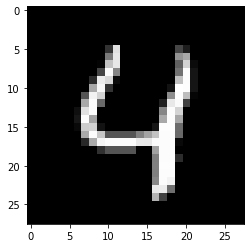

In [0]:
(Images_train, Labels_train_orig), (Images_test, Labels_test_orig) = mnist.load_data()
print("Images_train original shape", Images_train.shape)
print("Labels_train original shape", Labels_train_orig.shape)
from keras import backend as K

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    Images_train = Images_train.reshape(Images_train.shape[0], 1, img_rows, img_cols)
    Images_test = Images_test.reshape(Images_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    Images_train = Images_train.reshape(Images_train.shape[0], img_rows, img_cols, 1)
    Images_test = Images_test.reshape(Images_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

Images_train = Images_train.astype('float32')
Images_test = Images_test.astype('float32')
Images_train /= 255
Images_test /= 255
print('x_train shape:', Images_train.shape)
print(Images_train.shape[0], 'train samples')
print(Images_test.shape[0], 'test samples')

first_image = Images_test[4]
print(first_image.shape)
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [0]:
#LeNet 5
#1st layer: 32,32,3 input
#2nd layer: 28,28,6 conv 1
#3rd layer: 14,14,6 pool 1
#4rth layer: 10,10,16 conv2
#5th layer : 5,5,16 pool 2 -> flatten
#6th layer and beyond: use a standard deep network


from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(12, 12, 2)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_29 (Dropout)         (None, 256)             

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(Images_train, Labels_train,
          batch_size=128, epochs=3,
          verbose=1,
          validation_data=(Images_test, Labels_test), shuffle = True)

score = model.evaluate(Images_test, Labels_test,
                       verbose=1)
print(score)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 59s 976us/step - loss: 0.0605 - acc: 0.9843 - val_loss: 0.0322 - val_acc: 0.9909
Epoch 2/3
60000/60000 [==============================] - 59s 981us/step - loss: 0.0527 - acc: 0.9869 - val_loss: 0.0317 - val_acc: 0.9912
Epoch 3/3
10000/10000 [==============================] - 3s 313us/step
[0.029186859695821295, 0.9911]


In [0]:
#Predict test images
predicted_classes = model.predict_classes(Images_test)

#Check correct and incorrect predictions
correct_indices = np.nonzero(predicted_classes == Labels_test_orig)[0]
print(correct_indices.shape)
#<<<< Calcular los índices incorrectos >>>>
#así podríamos ver las imágenes de los números en los que se equivoca
wrong_indices = np.nonzero(predicted_classes != Labels_test_orig)[0]
print(wrong_indices.shape)

(9911,)
(89,)
